In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import path
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union, unary_union, transform
from datetime import datetime, timedelta
import datetime
import math
from scipy.ndimage.interpolation import shift
import shapely.wkt
from shapely.validation import explain_validity,make_valid
import xarray as xr
import pygeos as pg
import time
import seaborn as sns
from my_functions import sat_vap_press, vap_press, hot_dry_windy, haines
from joblib import Parallel, delayed
import multiprocessing
from os.path import exists

In [2]:
df_fire = gpd.read_file('./fire_polygons/lake_VIIRS_daily_12Z_day_start.geojson')
print(df_fire)

     Local Day  Incident Number Fire Name Current Day  Current Overpass  \
0   2020-08-12       11773470.0      LAKE  2020-08-13             942.0   
1   2020-08-13       11773470.0      LAKE  2020-08-14            2100.0   
2   2020-08-14       11773470.0      LAKE  2020-08-15            2130.0   
3   2020-08-15       11773470.0      LAKE  2020-08-16            2112.0   
4   2020-08-16       11773470.0      LAKE  2020-08-17            2142.0   
5   2020-08-17       11773470.0      LAKE  2020-08-18            2124.0   
6   2020-08-18       11773470.0      LAKE  2020-08-19            2200.0   
7   2020-08-19       11773470.0      LAKE  2020-08-20            2136.0   
8   2020-08-20       11773470.0      LAKE  2020-08-21            2118.0   
9   2020-08-21       11773470.0      LAKE  2020-08-22            2148.0   
10  2020-08-22       11773470.0      LAKE  2020-08-23            2130.0   
11  2020-08-29       11773470.0      LAKE  2020-08-30            1012.0   

     Lat Fire    Lon Fir

<AxesSubplot:>

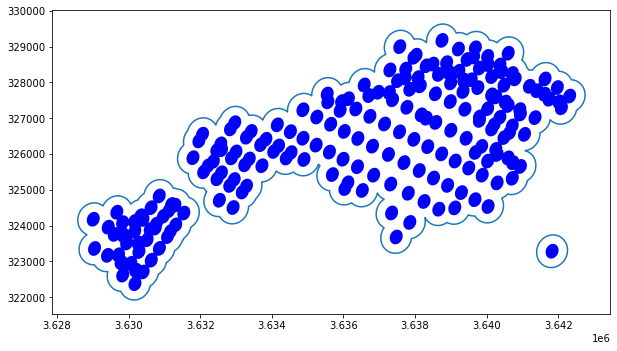

In [33]:
fig,ax=plt.subplots(figsize=(10,6))
#df_fire.iloc[0:1].buffer(100).plot(ax=ax,color = 'r')
df_fire.iloc[0:1].plot(ax=ax,color='b')
df_fire.iloc[0:1].buffer(250).boundary.plot(ax=ax)


In [37]:
for geom in df_fire['geometry'].iloc[0:1]:
    print(geom)

MULTIPOLYGON (((3641986.5847 323212.3393, 3641977.403 323193.7372, 3641966.7721 323175.997, 3641954.7943 323159.2897, 3641941.585 323143.7761, 3641927.2715 323129.6057, 3641911.9915 323116.915, 3641895.8921 323105.8262, 3641879.1286 323096.446, 3641861.8622 323088.8649, 3641844.2593 323083.1558, 3641826.4894 323079.3738, 3641808.7237 323077.5553, 3641791.1332 323077.7177, 3641773.8874 323079.8595, 3641757.1524 323083.9602, 3641741.0893 323089.9801, 3641725.853 323097.8614, 3641711.59 323107.5281, 3641698.4379 323118.887, 3641686.5233 323131.8289, 3641675.9608 323146.229, 3641666.8524 323161.9487, 3641659.2856 323178.8366, 3641653.3333 323196.7299, 3641649.053 323215.4565, 3641646.4857 323234.8358, 3641645.6562 323254.6814, 3641646.5725 323274.8019, 3641649.2258 323295.0038, 3641653.5904 323315.0924, 3641659.6244 323334.8742, 3641667.2696 323354.1588, 3641676.4523 323372.7604, 3641687.0841 323390.5, 3641699.0627 323407.2065, 3641712.2726 323422.7193, 3641726.5866 323436.8889, 3641741.86